# Dynamics



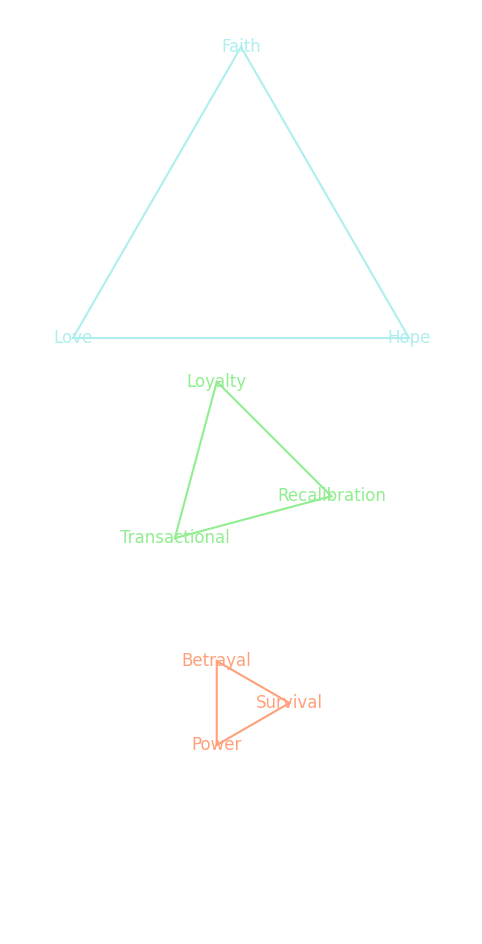

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def draw_triangle(ax, vertices, labels, color='black'):
    """Draws a triangle given vertices and labels for each vertex with matching color."""
    triangle = plt.Polygon(vertices, edgecolor=color, fill=None, linewidth=1.5)
    ax.add_patch(triangle)
    for i, (x, y) in enumerate(vertices):
        ax.text(x, y, labels[i], fontsize=12, ha='center', va='center', color=color)  # Set label color

def get_triangle_vertices_3d(center, radius, perspective_scale, tilt):
    """
    Returns the vertices of a tilted equilateral triangle for a 3D effect.
    `perspective_scale` shrinks the triangle to simulate depth.
    `tilt` applies a slight rotation for perspective effect.
    """
    angles = np.linspace(0, 2 * np.pi, 4)[:-1] + np.pi/2  # angles for vertices of an equilateral triangle
    vertices = np.column_stack([center[0] + radius * perspective_scale * np.cos(angles + tilt),
                                center[1] + radius * perspective_scale * np.sin(angles + tilt)])
    return vertices

# Create the plot
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust the width and height as needed

ax.set_aspect('equal')

# Define the centers for each triangle, shifting each down from the previous
centers = [(0, 10), (0, 0), (0, -10)]  # Blue at the top, green in the middle, red at the bottom
radii = [6, 4.5, 3]  # Adjusting radii for each layer
triads = [
    ['Faith', 'Love', 'Hope'],          # Blue topmost triangle
    ['Loyalty', 'Transactional', 'Recalibration'],  # Green middle triangle
    ['Betrayal', 'Power', 'Survival']    # Red bottom triangle
]

# Set the color scheme: blue, green, red
colors = ['paleturquoise', 'lightgreen', 'lightsalmon']

# 3D perspective parameters: smaller scale as the fractal moves inward (simulating depth)
scales = [1.4, 0.9, 0.7]  # simulate depth
tilts = [0, np.pi / 12, np.pi / 6]  # slight rotation for perspective

# Draw the triangles with increasing radius and perspective scaling
for center, radius, triad, color, scale, tilt in zip(centers, radii, triads, colors, scales, tilts):
    vertices = get_triangle_vertices_3d(center, radius, scale, tilt)
    draw_triangle(ax, vertices, triad, color=color)

# Set limits and hide axes to fit the frame
ax.set_xlim(-10, 10)
ax.set_ylim(-20, 20)
ax.axis('off')

# Save the plot as 'logo.png'
# plt.savefig('figures/logo.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()